In [1]:
# Importo las funciones necesarias

from tokenizer import Tokenizer
from sat import Sat
from generator import Generator

In [2]:
# Puedo crear una expresion manualmente

expression = 'a and b and (c and not a or (not d and a and c)) and (c or d or f or (b and not c))'

In [38]:
# Puedo generar expresiones automaticamente

gen = Generator(clause_count=6, literals_per_clause=6, variable_count=17, var_name='x')

expression = gen.generate()

In [39]:
# Genero los tokens para identificar las variables de la expresion

tokenizer = Tokenizer(expression)
tokens, var_names = tokenizer.tokenize()

print('Expresion:', expression)
print('\nContador de tokens:', tokens)
print('\nVariables de la expresion:', var_names)

Expresion: (not x6 or x2 or not x12 or not x16 or x13 or not x4) and (x17 or not x10 or not x14 or not x16 or not x9 or x5) and (x9 or x2 or x12 or x15 or not x1 or not x13) and (x16 or x14 or not x4 or not x8 or not x11 or x1) and (not x14 or not x17 or x12 or not x6 or x2 or x3) and (not x7 or not x15 or not x2 or x10 or x1 or not x16)

Contador de tokens: {'and': 5, 'or': 30, 'not': 20, '(': 6, ')': 6, 'var': 36}

Variables de la expresion: ['x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']


In [40]:
# ejecuto el algoritmo, que toma como parametros la expresion, el arreglo de variables
# y un booleano que indica si se hace un reporte de las operaciones

sat = Sat()

result_sat, time = sat.sat_algorithm(expression, var_names, verbose=False)

print('\nExecution time {} seconds'.format(time))

if len(result_sat) > 0:
        print('\nExpression "{}" is True'.format(expression))

        print('\nNumber of solutions is {}\n'.format(len(result_sat)))

        if len(result_sat) < 10:

                for result in result_sat:

                        print(result)
else:
        print('\nExpression "{}" is False'.format(expression))


Execution time 11.13290219999999 seconds

Expression "(not x6 or x2 or not x12 or not x16 or x13 or not x4) and (x17 or not x10 or not x14 or not x16 or not x9 or x5) and (x9 or x2 or x12 or x15 or not x1 or not x13) and (x16 or x14 or not x4 or not x8 or not x11 or x1) and (not x14 or not x17 or x12 or not x6 or x2 or x3) and (not x7 or not x15 or not x2 or x10 or x1 or not x16)" is True

Number of solutions is 118976



In [45]:
# Funcion para graficar los resultados

import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)
    plt.scatter(nodes, times)

    plt.xlabel('Cantidad de variables')
    plt.ylabel('Ejecucion en minutos')

    plt.suptitle('Crecimiento del costo temporal')
    plt.show()

Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...


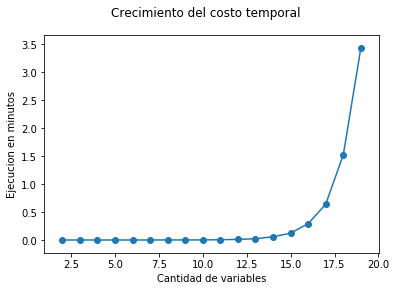

In [54]:
cant_var = []
times = []

for n in range(2, 20):

    gen = Generator(clause_count=(n), literals_per_clause=(n//2), variable_count=n, var_name='x')
    expression = gen.generate()

    print('Evaluating...')

    tokenizer = Tokenizer(expression)
    _, var_names = tokenizer.tokenize()

    sat = Sat()

    _, time = sat.sat_algorithm(expression, var_names, verbose=False)

    cant_var.append(n)
    times.append(time/60)


plot_historic(cant_var, times)   